<h1>Quick look at the data and cleaning it.</h1>

In [70]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_to_analyze.csv')
df

,Unnamed: 0,cena,powierzchnia,liczba_pokoi,stan_wykonczenia,balkon_ogrod_taras,czynsz,miejsce_parkingowe,ogrzewanie,lokalizacja
0,0,756438.0,54.42,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ..."
1,1,860688.0,61.92,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ..."
2,2,1228482.0,88.38,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ..."
3,3,865000.0,85.22,4.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,inne,"ul. Mała Góra, Bieżanów, Bieżanów-Prokocim, Kr..."
4,4,439000.0,31.73,1.0,do remontu,NaN,330.0,NaN,miejskie,"Nowa Huta, Nowa Huta, Kraków, małopolskie"
...,...,...,...,...,...,...,...,...,...,...
7176,7176,2500000.0,133.00,3.0,do zamieszkania,"balkon, taras",NaN,NaN,NaN,"Kazimierz, Stare Miasto, Kraków, małopolskie"
7177,7177,1990000.0,98.00,3.0,do zamieszkania,NaN,NaN,garaż/miejsce parkingowe,gazowe,"Nowa Wieś, Krowodrza, Kraków, małopolskie"
7178,7178,4000000.0,100.00,1.0,do zamieszkania,"ogródek, taras",NaN,garaż/miejsce parkingowe,gazowe,"Osiedle Oficerskie, Grzegórzki, Kraków, małopo..."
7179,7179,100000.0,10.00,2.0,do remontu,balkon,550.0,NaN,miejskie,"Prądnik Czerwony, Prądnik Czerwony, Kraków, ma..."


In [71]:
#dropping 2nd index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

#some stats for the dataset
df.describe()

,cena,powierzchnia,liczba_pokoi,czynsz
count,6.084000e+03,7181.000000,7171.000000,2265.000000
mean,9.752528e+05,61.800248,2.738530,558.548344
std,6.541851e+05,32.948076,1.039576,290.215788
min,2.100000e+04,3.000000,1.000000,1.000000
25%,6.540000e+05,42.980000,2.000000,400.000000
50%,8.350000e+05,55.820000,3.000000,520.000000
75%,1.075000e+06,70.750000,3.000000,700.000000
max,1.070000e+07,706.000000,10.000000,5000.000000


In [72]:
#condition of the building value_counts
df['stan_wykonczenia'].value_counts()

do wykończenia     3616
do zamieszkania    2031
do remontu          193
Name: stan_wykonczenia, dtype: int64

In [73]:
df['balkon_ogrod_taras'].value_counts()
#we need to get rid of "duplicates" here

balkon                    3853
ogródek                    512
balkon, taras              299
taras                      237
ogródek, taras             175
balkon, ogródek            113
balkon, ogródek, taras      90
taras, ogródek              59
taras, balkon               18
taras, balkon, ogródek       3
balkon, taras, ogródek       2
Name: balkon_ogrod_taras, dtype: int64

In [74]:
df['balkon_ogrod_taras'] = df['balkon_ogrod_taras'].apply(lambda x: 'balkon, ogródek, taras' if x in ['taras, balkon, ogródek', 'balkon, taras, ogródek']
                                               else x)
df['balkon_ogrod_taras'] = df['balkon_ogrod_taras'].apply(lambda x: 'balkon, taras' if x == 'taras, balkon'
                                               else x)
df['balkon_ogrod_taras'] = df['balkon_ogrod_taras'].apply(lambda x: 'balkon, ogródek' if x == 'ogródek, balkon'
                                               else x)
df['balkon_ogrod_taras'] = df['balkon_ogrod_taras'].apply(lambda x: 'ogródek, taras' if x == 'taras, ogródek'
                                               else x)
df['balkon_ogrod_taras'].value_counts()

balkon                    3853
ogródek                    512
balkon, taras              317
taras                      237
ogródek, taras             234
balkon, ogródek            113
balkon, ogródek, taras      95
Name: balkon_ogrod_taras, dtype: int64

In [75]:
df['miejsce_parkingowe'].value_counts()
#I think we can assume that Nan means that there is no parking slot assigned to the property
#I need to change Nan to "no parking slot"

garaż/miejsce parkingowe    4894
Name: miejsce_parkingowe, dtype: int64

In [76]:
df['miejsce_parkingowe'].fillna('brak', inplace=True)

In [77]:
df_not_krakow = df[~df['lokalizacja'].str.contains('kraków', case=False)]
df_not_krakow.info()

#as we can see there are some properties that are not located in Kraków, I should to get rid of them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 17 to 6927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cena                47 non-null     float64
 1   powierzchnia        47 non-null     float64
 2   liczba_pokoi        47 non-null     float64
 3   stan_wykonczenia    39 non-null     object 
 4   balkon_ogrod_taras  45 non-null     object 
 5   czynsz              17 non-null     float64
 6   miejsce_parkingowe  47 non-null     object 
 7   ogrzewanie          35 non-null     object 
 8   lokalizacja         47 non-null     object 
dtypes: float64(4), object(5)
memory usage: 3.7+ KB


In [78]:
df.drop(df_not_krakow.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [79]:
#I also wanna add "dzielnica" column, so I can get analyze data depending on district

df['dzielnica'] = df['lokalizacja']

def dzielnica(x):
    if 'Stare Miasto' in x:
        return 'Stare Miasto'
    elif 'Grzegórzki' in x:
        return 'Grzegórzki'
    elif 'Prądnik Czerwony' in x:
        return 'Prądnik Czerwony'
    elif 'Prądnik Biały' in x:
        return 'Prądnik Biały'
    elif 'Krowodrza' in x:
        return 'Krowodrza'
    elif 'Bronowice' in x:
        return 'Bronowice'
    elif 'Zwierzyniec' in x:
        return 'Zwierzyniec'
    elif 'Łagiewniki-Borek Fałęcki' in x:
        return 'Łagiewniki-Borek Fałęcki'
    elif 'Swoszowice' in x:
        return 'Swoszowice'
    elif 'Podgórze Duchackie' in x:
        return 'Podgórze Duchackie'
    elif 'Bieżanów-Prokocim' in x:
        return 'Bieżanów-Prokocim'
    elif 'Podgórze' in x and 'Podgórze Duchackie' not in x:
        return 'Podgórze'
    elif 'Czyżyny' in x:
        return 'Czyżyny'
    elif 'Mistrzejowice' in x:
        return 'Mistrzejowice'
    elif 'Bieńczyce' in x:
        return 'Bieńczyce'
    elif 'Wzgórza Krzesławickie' in x:
        return 'Wzgórza Krzesławickie'
    elif 'Nowa Huta' in x:
        return 'Nowa Huta'
    elif 'Dębniki' in x:
        return 'Dębniki'
    
df['dzielnica'] = df['dzielnica'].apply(lambda x: dzielnica(x))

df['dzielnica'].value_counts()

Prądnik Biały               1047
Podgórze                     969
Bronowice                    626
Dębniki                      574
Stare Miasto                 543
Krowodrza                    442
Mistrzejowice                407
Bieżanów-Prokocim            406
Zwierzyniec                  373
Grzegórzki                   350
Podgórze Duchackie           349
Prądnik Czerwony             315
Nowa Huta                    277
Czyżyny                      141
Wzgórza Krzesławickie        117
Swoszowice                    84
Bieńczyce                     71
Łagiewniki-Borek Fałęcki      43
Name: dzielnica, dtype: int64

<h1>Cleaned up dataframe</h1>

In [80]:
df

,cena,powierzchnia,liczba_pokoi,stan_wykonczenia,balkon_ogrod_taras,czynsz,miejsce_parkingowe,ogrzewanie,lokalizacja,dzielnica
0,756438.0,54.42,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ...",Podgórze Duchackie
1,860688.0,61.92,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ...",Podgórze Duchackie
2,1228482.0,88.38,3.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,gazowe,"ul. Tuchowska, Kurdwanów, Podgórze Duchackie, ...",Podgórze Duchackie
3,865000.0,85.22,4.0,do wykończenia,balkon,NaN,garaż/miejsce parkingowe,inne,"ul. Mała Góra, Bieżanów, Bieżanów-Prokocim, Kr...",Bieżanów-Prokocim
4,439000.0,31.73,1.0,do remontu,NaN,330.0,brak,miejskie,"Nowa Huta, Nowa Huta, Kraków, małopolskie",Nowa Huta
...,...,...,...,...,...,...,...,...,...,...
7129,2500000.0,133.00,3.0,do zamieszkania,"balkon, taras",NaN,brak,NaN,"Kazimierz, Stare Miasto, Kraków, małopolskie",Stare Miasto
7130,1990000.0,98.00,3.0,do zamieszkania,NaN,NaN,garaż/miejsce parkingowe,gazowe,"Nowa Wieś, Krowodrza, Kraków, małopolskie",Krowodrza
7131,4000000.0,100.00,1.0,do zamieszkania,"ogródek, taras",NaN,garaż/miejsce parkingowe,gazowe,"Osiedle Oficerskie, Grzegórzki, Kraków, małopo...",Grzegórzki
7132,100000.0,10.00,2.0,do remontu,balkon,550.0,brak,miejskie,"Prądnik Czerwony, Prądnik Czerwony, Kraków, ma...",Prądnik Czerwony


<h1>Data analysis and visualisation</h1>

<h3>Bar plot describing average price of a property depending on district</h3>

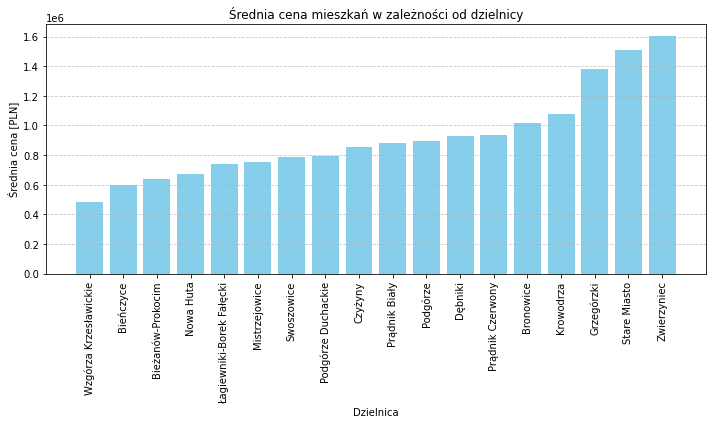

In [81]:
import matplotlib.pyplot as plt

avg_prices = df.groupby('dzielnica')['cena'].mean().reset_index()
avg_prices = avg_prices.sort_values(by='cena')

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['dzielnica'], avg_prices['cena'], color='skyblue')
plt.title('Średnia cena mieszkań w zależności od dzielnicy')
plt.xlabel('Dzielnica')
plt.ylabel('Średnia cena [PLN]')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

<h3>Plot describing average area of a property depending on number of rooms</h3>

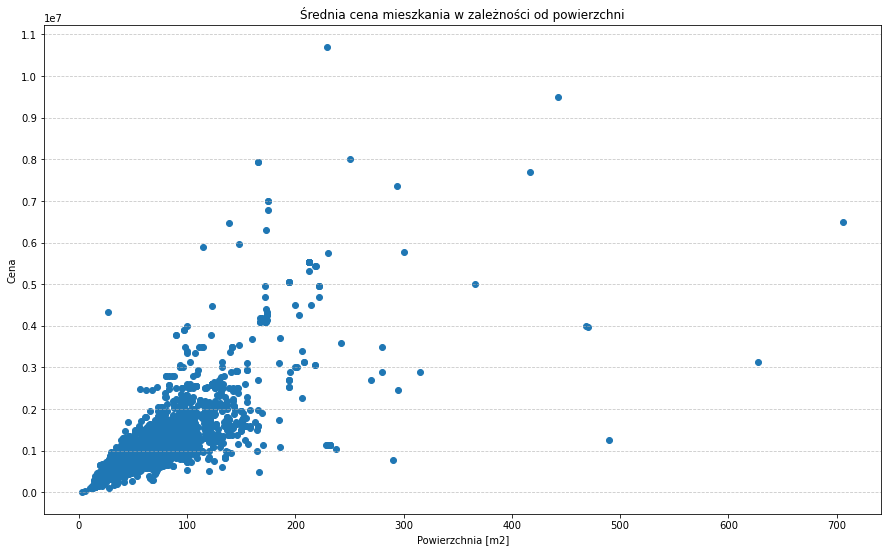

In [107]:
plt.figure(figsize=(15, 9))
plt.scatter(df['powierzchnia'], df['cena'])
plt.title('Średnia cena mieszkania w zależności od powierzchni')
plt.xlabel('Powierzchnia [m2]')
plt.ylabel('Cena')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Determine suitable ytick intervals
max_y = max(df['cena'])
ytick_interval = 10 ** (int(np.log10(max_y)) - 1)  # Adjust interval based on order of magnitude

# Set yticks
yticks = np.arange(0, max_y + ytick_interval, ytick_interval)
plt.yticks(yticks)

plt.show()
plt.close()

There are not many properties with area > 175

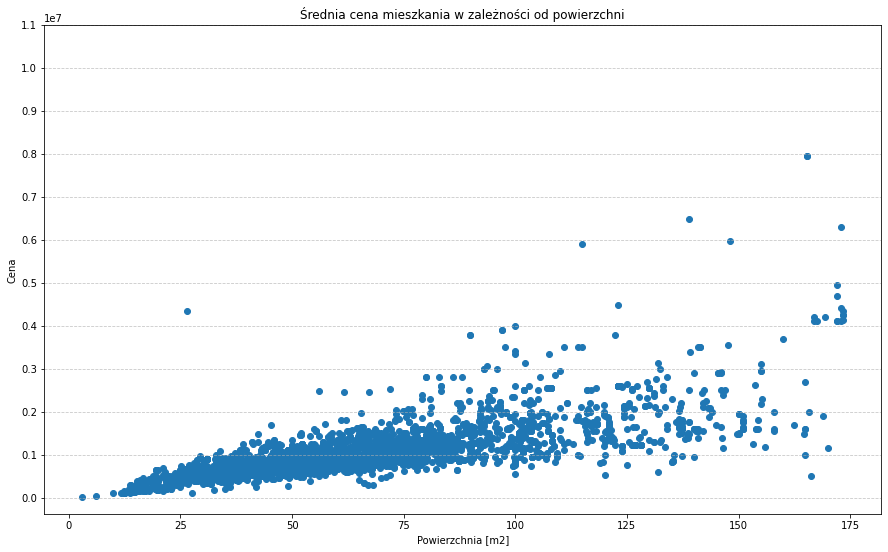

In [110]:
df2 = df[df['powierzchnia']<175]
plt.figure(figsize=(15, 9))
plt.scatter(df2['powierzchnia'], df2['cena'])
plt.title('Średnia cena mieszkania w zależności od powierzchni')
plt.xlabel('Powierzchnia [m2]')
plt.ylabel('Cena')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Determine suitable ytick intervals
max_y = max(df['cena'])
ytick_interval = 10 ** (int(np.log10(max_y)) - 1)  # Adjust interval based on order of magnitude

# Set yticks
yticks = np.arange(0, max_y + ytick_interval, ytick_interval)
plt.yticks(yticks)

plt.show()
plt.close()

<h3>Plot describing average area of a property depending on number of rooms</h3>

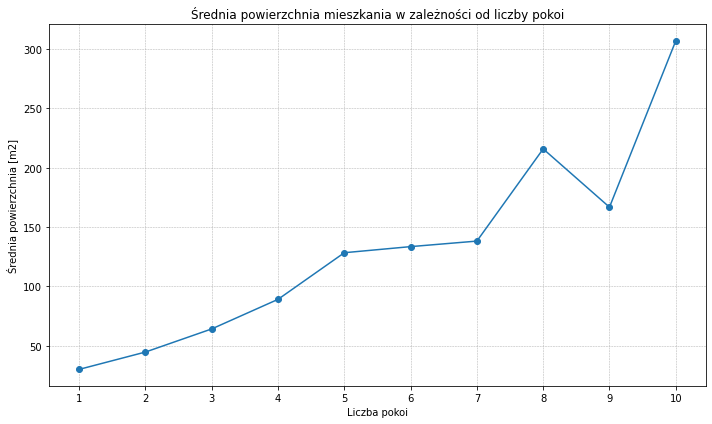

In [22]:
avg_area_per_room = df.groupby('liczba_pokoi')['powierzchnia'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_area_per_room['liczba_pokoi'], avg_area_per_room['powierzchnia'], marker='o', linestyle='-')
plt.title('Średnia powierzchnia mieszkania w zależności od liczby pokoi')
plt.xlabel('Liczba pokoi')
plt.ylabel('Średnia powierzchnia [m2]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(avg_area_per_room['liczba_pokoi'])
plt.tight_layout()
plt.show()
plt.close()

In [23]:
df['liczba_pokoi'].value_counts()

3.0     2625
2.0     2429
4.0     1102
1.0      654
5.0      230
6.0       62
7.0       12
10.0       4
9.0        4
8.0        2
Name: liczba_pokoi, dtype: int64

I decided to remove properties that have more than 8 rooms, because there aren't enough of them to get useful info

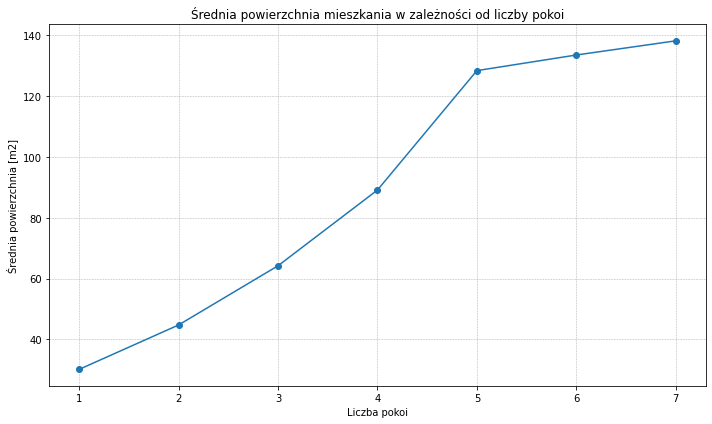

In [24]:
avg_area_per_room = df[df['liczba_pokoi'] <= 7].groupby('liczba_pokoi')['powierzchnia'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_area_per_room['liczba_pokoi'], avg_area_per_room['powierzchnia'], marker='o', linestyle='-')
plt.title('Średnia powierzchnia mieszkania w zależności od liczby pokoi')
plt.xlabel('Liczba pokoi')
plt.ylabel('Średnia powierzchnia [m2]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(avg_area_per_room['liczba_pokoi'])
plt.tight_layout()
plt.show()
plt.close()

<h3>Bar plot describing average price of a property depending on condition</h3>

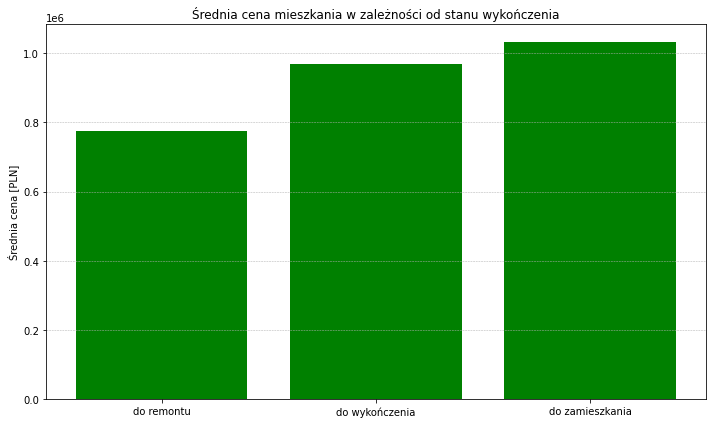

In [25]:
avg_prices = df.groupby('stan_wykonczenia')['cena'].mean().reset_index()
avg_prices.sort_values(by='cena')

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['stan_wykonczenia'], avg_prices['cena'], color='green')
plt.title('Średnia cena mieszkania w zależności od stanu wykończenia')
plt.ylabel('Średnia cena [PLN]')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
plt.close()

<h3>Some pie plots to see percentage distribution for chosen columns</h3>

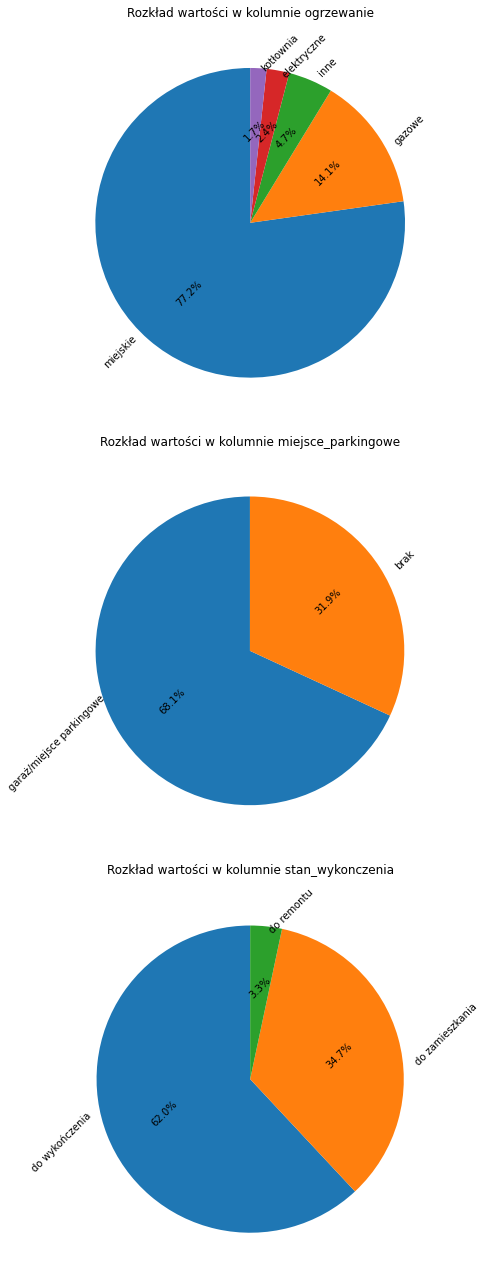

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(8, 18))
axes = axes.flatten()

columns = ['ogrzewanie', 'miejsce_parkingowe', 'stan_wykonczenia']

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'rotation': 45})
    axes[i].set_title(f'Rozkład wartości w kolumnie {col}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplots_adjust(top=1.5)    
plt.tight_layout()
plt.show()